# Reference
Same as Jonathan's URL
https://stackoverflow.com/questions/64830383/calculating-bull-bear-markets-in-pandas

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [23]:
pip install requests-cache

In [24]:
import requests_cache
session = requests_cache.CachedSession()

In [25]:
# Yahoo tickers:
# Equity Index (1927~): S&P500:'^GSPC', FTSE100:'^FTSE', Nikkei225:'^N225'
# Companies (1962~): Caterpillar:'CAT', P&G:'PG', J&J:'JNJ'

df = yf.download('^GSPC', session=session)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2024-02-12,5026.830078,5048.390137,5016.830078,5021.839844,5021.839844,3805740000
2024-02-13,4967.939941,4971.299805,4920.310059,4953.169922,4953.169922,4302190000
2024-02-14,4976.439941,5002.520020,4956.450195,5000.620117,5000.620117,3845600000


             min        max
bearn                      
1     1929-09-17 1932-05-31
2     1956-08-06 1957-10-21
3     1961-12-13 1962-06-25
4     1966-02-10 1966-10-06
5     1968-12-02 1970-05-25
6     1973-01-12 1974-10-02
7     1980-12-01 1982-08-11
8     1987-08-26 1987-12-03
9     2000-03-27 2002-10-08
10    2007-10-10 2009-03-06
11    2020-02-20 2020-03-20
12    2022-01-04 2022-10-11


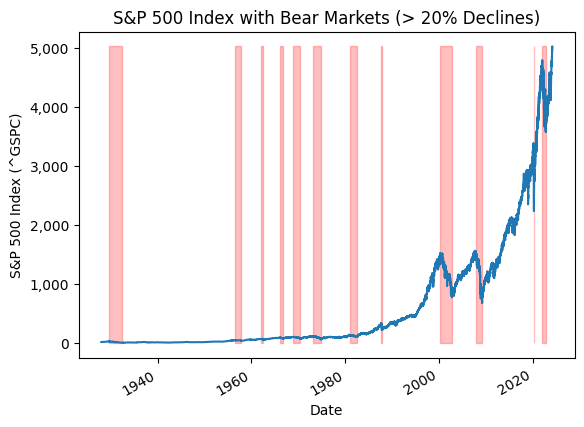

In [26]:
df['dd'] = df['Adj Close'].div(df['Adj Close'].cummax()).sub(1)
df['ddn'] = ((df['dd'] < 0.) & (df['dd'].shift() == 0.)).cumsum()
df['ddmax'] = df.groupby('ddn')['dd'].transform('min')
df['bear'] = (df['ddmax'] < -0.2) & (df['ddmax'] < df.groupby('ddn')['dd'].transform('cummin'))
df['bearn'] = ((df['bear'] == True) & (df['bear'].shift() == False)).cumsum()

bears = df.reset_index().query('bear == True').groupby('bearn')['Date'].agg(['min', 'max'])
print(bears)

df['Adj Close'].plot()
for i, row in bears.iterrows():
    plt.fill_between(row, df['Adj Close'].max(), alpha=0.25, color='r')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('S&P 500 Index (^GSPC)')
plt.title('S&P 500 Index with Bear Markets (> 20% Declines)')

plt.savefig('bears.png')
plt.show()